### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math, copy

In [2]:
# Reproducibility
np.random.seed(0)

# Number of samples
n = 50

# Generate the feature: hours studied (between 0 and 10)
hours_studied = np.random.uniform(0, 10, n)

# Logistic function (sigmoid) to simulate probability of passing
z = 1.5 * hours_studied - 7  # adjust weights/bias
probability = 1 / (1 + np.exp(-z))

# Generate binary outcomes (pass/fail) from probabilities
passed = np.random.binomial(1, probability)

# Create DataFrame
df = pd.DataFrame({
    'HoursStudied': hours_studied,
    'Passed': passed
})

# Show first few rows
df.head()

,HoursStudied,Passed
0,5.488135,1
1,7.151894,1
2,6.027634,0
3,5.448832,1
4,4.236548,0


Text(0, 0.5, 'Passed ?')

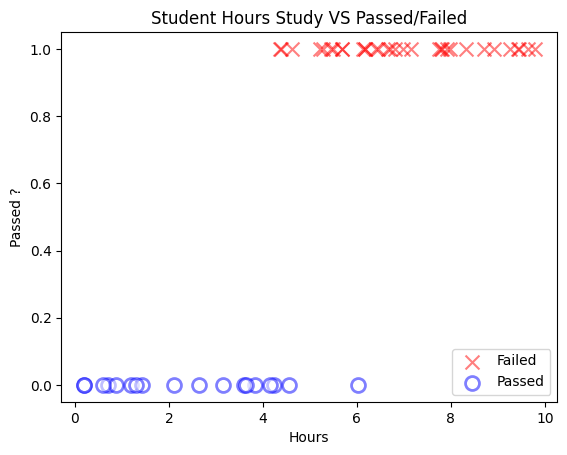

In [3]:
failed_group_df = df[df.Passed == 1]
passed_group_df = df[df.Passed == 0]

plt.scatter(failed_group_df.HoursStudied, failed_group_df.Passed,
            marker = 'x', facecolor='red', s=100, alpha=0.5 ,label='Failed')

plt.scatter(passed_group_df.HoursStudied, passed_group_df.Passed,
           marker = 'o', facecolor='white', edgecolor='blue',
            alpha=0.5,lw=2,s=100, label='Passed')
plt.legend(loc='lower right')
plt.title("Student Hours Study VS Passed/Failed")
plt.xlabel("Hours")
plt.ylabel("Passed ?")

Text(0, 0.5, 'Passed ?')

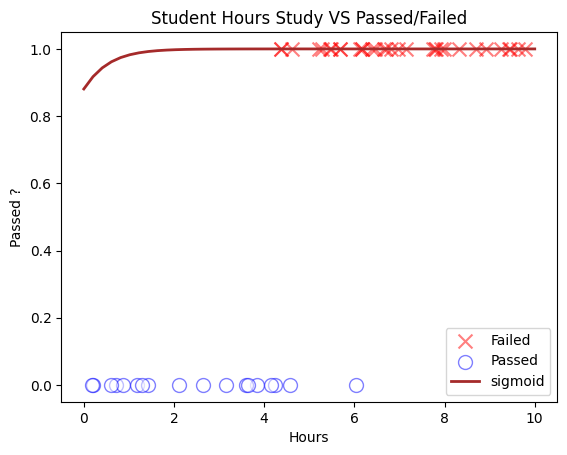

In [4]:
plt.scatter(failed_group_df.HoursStudied, failed_group_df.Passed, marker='x', s=100, c='r', alpha=0.5, label='Failed')
plt.scatter(passed_group_df.HoursStudied, passed_group_df.Passed, marker='o', s=100, facecolor='white',edgecolor='blue', alpha=0.5, label='Passed')

x_val = np.linspace(0,10)
w = 2
b = 2
z = w * x_val + b
y_val = 1 / (1 +  np.exp(-z))

plt.plot(x_val, y_val, linestyle='solid', lw=2, color='brown', label='sigmoid')

plt.legend(loc='lower right')
plt.title("Student Hours Study VS Passed/Failed")
plt.xlabel("Hours")
plt.ylabel("Passed ?")

Text(0, 0.5, 'Passed ?')

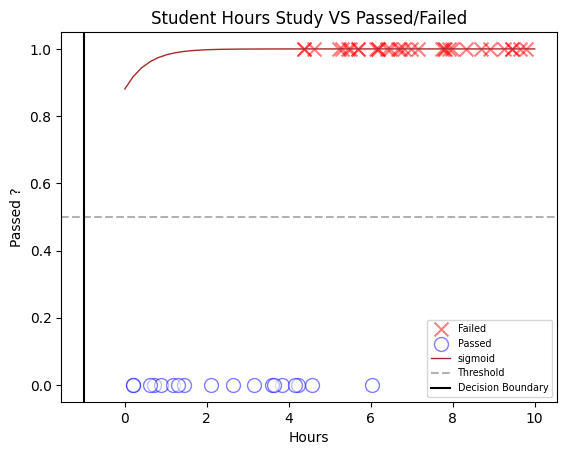

In [5]:
plt.scatter(failed_group_df.HoursStudied, failed_group_df.Passed, marker='x', s=100, c='r', alpha=0.5, label='Failed')
plt.scatter(passed_group_df.HoursStudied, passed_group_df.Passed, marker='o', s=100, facecolor='white',edgecolor='blue', alpha=0.5, label='Passed')

x_val = np.linspace(0,10)
w = 2
b = 2
z = w * x_val + b
y_val = 1 / (1 +  np.exp(-z))

plt.plot(x_val, y_val, linestyle='solid', lw=1, color='brown', label='sigmoid')

threshold = 0.5
plt.axhline(threshold, color='black', alpha=0.3, linestyle='--', label='Threshold')
decision_boundary = (-1 * np.log((1/threshold) - 1) - b) / w
plt.axvline(decision_boundary, color='black', linestyle='solid', label='Decision Boundary')

plt.legend(loc='best', fontsize='x-small')
plt.title("Student Hours Study VS Passed/Failed")
plt.xlabel("Hours")
plt.ylabel("Passed ?")

In [6]:
def sigmoid(z):
    """
    Compute sigmoid of z
    Args:
        z (ndarray (m,)) : m training example
    Returns:
        prediction g(z): same shape as z
    """
    return 1 / (1 + np.exp(-z))

In [7]:
def logistic_regression_model(x, w, b):
    """
    output logistic regression output
    Args:
        x (ndarray (m, n)) : m examples with n features
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        f_wb (ndarray (m,)) : output of logistic regression regression
    """
    z = np.dot(x,w)+ b
    return sigmoid(z)

In [8]:
def compute_logistic_cost (x, y , w , b):
    """
    output cost for logistic regression : tells us how well our model is doing
    Args:
        x (ndarray (m, n)) : m examples with n features
        y (ndarray (m,)) : target values
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        J_wb(scalar) : output of logistic regression output
    """
    m = y.shape[0]
    epsilon = 1e-15
    f_wb = logistic_regression_model(x,w,b)
    loss = -y * np.log(f_wb + epsilon) - (1 - y) * np.log(1 - f_wb + epsilon)
    cost = (1 / m) * np.sum(loss)
    return cost

In [9]:
def compute_gradient (x, y, w, b):
    """
    output logistic regression output
    Args:
        x (ndarray (m, n)) : m examples with 
        y (ndarray (m,)) : target values
        w (ndarray (n)) : model paramters
        b (scalar) : model bias
    Returns:
        dj_dw (ndarray , (n,)) : derivide of cost w.r.t. w paramter
        dj_db (scalar)         : derivide of cost w.r.t. b paramter
    """
    m = y.shape[0]
    f_wb = logistic_regression_model(x,w,b)
    dj_dw = (x.T @ (f_wb - y)) * (1 / m)
    dj_db = np.sum(f_wb - y) * (1 / m)
    return dj_dw, dj_db

In [10]:
def gradient_descent (x,y,w_in, b_in, alpha, num_iter, cost_function, gradient_function, tolerance=1e-15):
    w = copy.deepcopy(w_in)
    b = b_in

    J_history = list()

    for i in range(num_iter):
        dj_dw , dj_db = gradient_function(x,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i <= 100000:
            J_history.append(cost_function(x,y,w,b))

        if i % math.ceil(num_iter / 10) == 0:
            J = cost_function(x,y,w,b)
            print(f"Iteration {i:5d} , Cost = {J:8.4f}")

        if i > 0 and abs(J_history[-1] - J_history[-2]) < tolerance : 
            print(f"Convergence at {i:4d}")
            break
    return w, b, J_history

In [11]:
w_in = w
b_in = b
alpha = 3 * 0.1
iteration = 100000

w_final, b_final , j_hist = gradient_descent(df.HoursStudied, df.Passed, w_in, b_in, alpha, iteration, compute_logistic_cost, compute_gradient)

Iteration     0 , Cost =   2.2303
Iteration 10000 , Cost =   0.1726
Iteration 20000 , Cost =   0.1726
Convergence at 26771


In [ ]:
plt.plot(j_hist)
plt.title("Learning Curve")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True, linestyle='--', alpha=0.5)

In [83]:
print(f"w = {w_final}, b = {b_final:.4f}, cost = {compute_logistic_cost(df.HoursStudied, df.Passed, w_final, b_final):.5f}")

w = 2.1879881793637863, b = -9.9586, cost = 0.17263


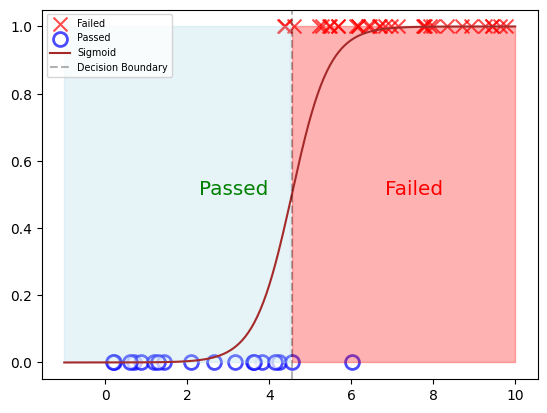

In [85]:
plt.scatter(failed_group_df.HoursStudied, failed_group_df.Passed, marker='x', facecolor='red',alpha=0.7, label='Failed', s=100)
plt.scatter(passed_group_df.HoursStudied, passed_group_df.Passed, marker='o', facecolor='white',alpha=0.7,edgecolor='blue',lw=2, label='Passed', s=100)
x_val = np.linspace(-1,10,300)
y_val = logistic_regression_model(x_val, w_final, b_final)
plt.plot(x_val, y_val, color='brown', label='Sigmoid')
threshold = 0.5
decision_boundary = (-1 * np.log((1/threshold) - 1) - b_final) / w_final
plt.axvline(decision_boundary, color='black', lw=1.5, linestyle='--', alpha=0.3, label='Decision Boundary')
plt.fill_between(x_val, 1 , where=(x_val < decision_boundary), color='lightblue', alpha=0.3)
plt.fill_between(x_val, 1 , where=(x_val >= decision_boundary), color='red', alpha=0.3);
plt.text(x=decision_boundary / 2, y=0.5 , s="Passed", color='Green', fontsize='x-large')
plt.text (x= decision_boundary + (decision_boundary / 2), y=0.5, color='red', fontsize='x-large', s='Failed')
plt.legend(loc='upper left', fontsize='x-small')